In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torchvision.io import read_image
import os
from PIL import Image
import matplotlib.pyplot as plt

In [36]:
input_size = 128
batch_size = 16
pretrained = True
learning_rate = 0.001
epochs = 5

In [3]:
transform = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
    

In [ ]:
train_dir = ""
valid_dir = ""

In [5]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
valid_dataset = datasets.ImageFolder(root=valid_dir, transform=transform)

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size)

In [7]:
model = models.alexnet(pretrained=pretrained)

/home/shilpavp/miniconda3/envs/comp_vis_env/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/shilpavp/miniconda3/envs/comp_vis_env/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
for param in model.parameters():
    param.requires_grad = False

In [9]:
model.classifier[6] = nn.Linear(4096, 5)

In [10]:
for param in model.classifier[6].parameters():
    param.requires_grad = True

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
model = model.to(device)

In [33]:
device

device(type='cpu')

In [2]:
torch.cuda.is_available()

False

In [14]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [32]:
len(train_dataloader)

251

In [31]:
a = iter(train_dataloader)
next(a)[0].shape

torch.Size([16, 3, 128, 128])

In [37]:
for i in range(epochs):
    model.train()
    print(f"\n Epoch {i+1} /{epochs}")
    running_loss = 0.0
    correct = 0.0 
    total_items = 0
    for j, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_pred = (preds == labels).sum().item()
        correct += correct_pred
        total_items += labels.size(0)
        if (i + 1) % 10 == 0:
            batch_acc = correct_pred / labels.size(0)
            print(f"[Batch {(j + 1)}/{len(train_dataloader)}] Loss:{loss.item():.4f}, Batch Accuracy{correct_pred:.4f}")

    train_acc = correct / total_items
    print(f"[Epoch {(i + 1)}/{epochs}] Loss:{running_loss:.4f}, Batch Accuracy{train_acc:.4f}")

        
    


 Epoch 1 /5
[Epoch 1/5] Loss:109.2835, Batch Accuracy0.8481

 Epoch 2 /5
[Epoch 2/5] Loss:88.9268, Batch Accuracy0.8805

 Epoch 3 /5
[Epoch 3/5] Loss:75.7579, Batch Accuracy0.8957

 Epoch 4 /5
[Epoch 4/5] Loss:73.5234, Batch Accuracy0.9009

 Epoch 5 /5
[Epoch 5/5] Loss:64.4260, Batch Accuracy0.9087


In [38]:
model.eval()
val_correct_total = 0
total_items = 0
for i, (images, labels) in enumerate(valid_dataloader):
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    _, pred = torch.max(output, 1)
    val_correct = (pred == labels).sum().item()
    val_acc = val_correct / labels.size(0)
    val_correct_total += val_correct
    total_items += labels.size(0)
validation_acc = val_correct_total / total_items
print(f"Validation accuracy{validation_acc}")

Validation accuracy0.8724035608308606


In [80]:
image = Image.open("/mnt/d/datasets/image.jpeg").convert("RGB")


In [81]:
image = transform(image)

In [82]:
img = image.unsqueeze(0)

In [83]:
img.shape

torch.Size([1, 3, 128, 128])

#### prediction using the model

In [84]:
out = model(img)

In [73]:
out

tensor([[-15.7501,  -5.4432, -13.9618,  20.1714, -10.7924]],
       grad_fn=<AddmmBackward0>)

In [85]:
_, model_pred = torch.max(out, 1)

In [86]:
model_pred

tensor([3])

In [87]:
data_set_labels = train_dataset.classes

In [88]:
data_set_labels

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

In [89]:
data_set_labels[model_pred]

'Sunflower'

In [90]:
mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
std = torch.tensor( [0.229, 0.224, 0.225]).view(3,1,1)
image = image * std + mean
image = image.squeeze(0)

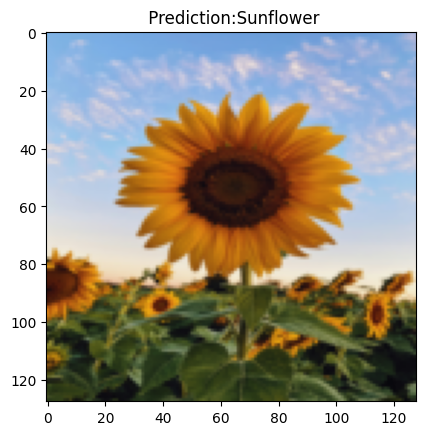

In [91]:
image = image.permute(1, 2, 0)
plt.imshow(image)
plt.title(f" Prediction:{data_set_labels[model_pred]}")
plt.show()